# CAPSTONE PROJECT SPORT-STATS

### Leonardo Saviane codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss 

from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [2]:
sport=pd.read_csv('athlete_events.csv')
region=pd.read_csv('noc_regions.csv')

sport

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


#### 1. Let's get dummies for Sex and Season, Male = 1 and Summer = 1

In [3]:
dummies=pd.get_dummies(sport[['Sex','Season']])

sport = pd.concat([sport,dummies[['Sex_M','Season_Summer']]],axis=1)

sport.drop(['Sex','Season'],axis=1,inplace=True)

sport.rename(columns={"Sex_M": "Sex", "Season_Summer": "Season"},inplace=True)

#### 2. Let's get dummies for Medal, if the athelete won a bronze/silver/ore medal then medal=1

In [4]:
dummies=pd.get_dummies(sport[['Medal']])

sport.drop(['Medal'],axis=1,inplace=True)

dummies['Medal'] = dummies.sum(axis=1)

sport = pd.concat([sport,dummies[['Medal']]],axis=1)

sport.rename(columns={"Medal": "Win"},inplace=True)

sport.head()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Sex,Season,Win
0,1,A Dijiang,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,1,1,0
1,2,A Lamusi,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,1,1,0
2,3,Gunnar Nielsen Aaby,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,1,1,0
3,4,Edgar Lindenau Aabye,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1,1,1
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0


#### 3. Let's count ho many missing value we have and drop the relative rows to avoid bias estimates

In [5]:
print('COUNT NAN')
print(sport[['Height','Weight','Age']].isna().sum())

COUNT NAN
Height    60171
Weight    62875
Age        9474
dtype: int64


In [6]:
#drop row where age is not there

sport.replace(np.nan, float('nan'), inplace=True)

sport.dropna(subset = ['Height','Weight','Age'],inplace=True) 

sport

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Sex,Season,Win
0,1,A Dijiang,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,1,1,0
1,2,A Lamusi,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,1,1,0
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0,0
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0,0
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,1,0,0
271112,135570,Piotr ya,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",1,0,0
271113,135570,Piotr ya,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",1,0,0
271114,135571,Tomasz Ireneusz ya,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Nagano,Bobsleigh,Bobsleigh Men's Four,1,0,0


##### As you can see after the cleaning the dataset is decreased from 271116 observations to 206165

#### 4. Final Cleaning: let's drop Games,Event and Team. I assume that NOC(National Olympic Commitee) = Team

##### further cleaning and dataframes will be made in SQL

In [7]:
sport.drop(['Games','Event','Team'],axis=1,inplace=True)

sport.head()

,ID,Name,Age,Height,Weight,NOC,Year,City,Sport,Sex,Season,Win
0,1,A Dijiang,24.0,180.0,80.0,CHN,1992,Barcelona,Basketball,1,1,0
1,2,A Lamusi,23.0,170.0,60.0,CHN,2012,London,Judo,1,1,0
4,5,Christine Jacoba Aaftink,21.0,185.0,82.0,NED,1988,Calgary,Speed Skating,0,0,0
5,5,Christine Jacoba Aaftink,21.0,185.0,82.0,NED,1988,Calgary,Speed Skating,0,0,0
6,5,Christine Jacoba Aaftink,25.0,185.0,82.0,NED,1992,Albertville,Speed Skating,0,0,0


#### 5. Let's see some statistics

##### overall differences

In [8]:
sport[['Age','Height','Weight','Sex','Win']].describe()

,Age,Height,Weight,Sex,Win
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.688337,0.676419,0.146392
std,5.483096,10.546088,14.340338,0.467843,0.353500
min,11.000000,127.000000,25.000000,0.000000,0.000000
25%,21.000000,168.000000,60.000000,0.000000,0.000000
50%,24.000000,175.000000,70.000000,1.000000,0.000000
75%,28.000000,183.000000,79.000000,1.000000,0.000000
max,71.000000,226.000000,214.000000,1.000000,1.000000


#### As we can see our dataset has mostly men (70%) and the average age is around 25 years old, max age is around 71 years old this may suggest that further cleaning is needed, for example removing atheletes above a certain age threshold (eg.50) to avoid bias estimate and because up to a certain age you cannot compete with younger athletes. an age count of the athletes is needed

##### Male and Female differences

In [9]:
sport_m=pysqldf('''select * from sport where Sex=1''')

sport_f=pysqldf('''select * from sport where Sex=0''')

sport_m[['Age','Height','Weight','Sex','Win']].describe()

,Age,Height,Weight,Sex,Win
count,139454.000000,139454.000000,139454.000000,139454.0,139454.000000
mean,25.665933,178.964834,75.790547,1.0,0.142205
std,5.346235,9.367787,13.180281,0.0,0.349261
min,12.000000,127.000000,28.000000,1.0,0.000000
25%,22.000000,173.000000,67.000000,1.0,0.000000
50%,25.000000,179.000000,74.000000,1.0,0.000000
75%,28.000000,185.000000,83.000000,1.0,0.000000
max,71.000000,226.000000,214.000000,1.0,1.000000


In [10]:
sport_f[['Age','Height','Weight','Sex','Win']].describe()

,Age,Height,Weight,Sex,Win
count,66711.000000,66711.000000,66711.000000,66711.0,66711.000000
mean,23.779467,167.861312,60.022575,0.0,0.155147
std,5.545791,8.767951,10.208164,0.0,0.362047
min,11.000000,127.000000,25.000000,0.0,0.000000
25%,20.000000,162.000000,54.000000,0.0,0.000000
50%,23.000000,168.000000,59.000000,0.0,0.000000
75%,27.000000,173.000000,65.000000,0.0,0.000000
max,69.000000,213.000000,167.000000,0.0,1.000000


#### Women Atheletes seem to be younger than men. In both groups max age is way above 50 hence we should take care of these outliers

### 6. Adding an arbitrary threshold or Changing Sample?
- some atheletes in 1920 competed at the age of 72(google research), these are clearly outlier that bias the estimate.
- The way people compete change over time, therefore to have interesting insights we should reduce the sample, taking the atheletes who competed at games after 1950, without imposing an arbirtrary threshold on age directly
- Hence I want to see the sample after the winter olympics of Moscow in 1980
- Note that the dataset is parented with local news to they do not take into consideration solely the olympic games, therefore we should take this into consideration.
- I will take into consideration the follwoing Olympics: Rio de Janeiro, London, Beijing,Athina,Sydney,Atlanta,Barcelona,Seoul,Los Angeles,Moscow,Sochi,Vancouver,Salt Lake City,Nagano,Lillehammer,Albertville,Calgary,Sarajevo,Lake Placid

In [11]:
sport_80=pysqldf('''select * from sport where Year>=1980 
and City in ('Rio de Janeiro', 'London', 'Beijing','Athina','Sydney','Atlanta','Barcelona','Seoul','Los Angeles','Moscow','Sochi','Vancouver','Salt Lake City','Nagano','Lillehammer','Albertville','Calgary','Sarajevo','Lake Placid')''')

sport_80.replace(np.nan, float('nan'), inplace=True)

sport_80.dropna(subset = ['Height','Weight','Age'],inplace=True) 

sport_m=pysqldf('''select * from sport_80 where Sex=1 ''')

sport_f=pysqldf('''select * from sport_80 where Sex=0 ''')

sport_80[['Age','Height','Weight','Sex','Win']].describe()

,Age,Height,Weight,Sex,Win
count,136875.000000,136875.000000,136875.000000,136875.000000,136875.000000
mean,25.285728,175.841571,70.983039,0.622466,0.142729
std,5.387866,10.893256,14.992473,0.484772,0.349797
min,12.000000,127.000000,28.000000,0.000000,0.000000
25%,22.000000,168.000000,60.000000,0.000000,0.000000
50%,25.000000,176.000000,70.000000,1.000000,0.000000
75%,28.000000,183.000000,80.000000,1.000000,0.000000
max,71.000000,226.000000,214.000000,1.000000,1.000000


In [12]:
sport_m[['Age','Height','Weight','Sex','Win']].describe()

,Age,Height,Weight,Sex,Win
count,85200.000000,85200.000000,85200.000000,85200.0,85200.000000
mean,25.824284,180.262711,77.295998,1.0,0.134965
std,5.238486,9.511485,13.724913,0.0,0.341688
min,12.000000,127.000000,37.000000,1.0,0.000000
25%,22.000000,174.000000,68.000000,1.0,0.000000
50%,25.000000,180.000000,76.000000,1.0,0.000000
75%,28.000000,186.000000,85.000000,1.0,0.000000
max,71.000000,226.000000,214.000000,1.0,1.000000


In [13]:
sport_f[['Age','Height','Weight','Sex','Win']].describe()

,Age,Height,Weight,Sex,Win
count,51675.000000,51675.000000,51675.000000,51675.0,51675.000000
mean,24.397775,168.552143,60.574446,0.0,0.155530
std,5.511821,8.932364,10.523527,0.0,0.362412
min,12.000000,132.000000,28.000000,0.0,0.000000
25%,21.000000,163.000000,54.000000,0.0,0.000000
50%,24.000000,168.000000,60.000000,0.0,0.000000
75%,28.000000,174.000000,66.000000,0.0,0.000000
max,63.000000,213.000000,167.000000,0.0,1.000000


#### Mean Age seem to increase rather than decrease as i expected. Median Age tends to increase as well. the current sample goes from 1996 to 2016, and count for more than 80000 observations, so the dataset is still big.

### 7. Let's visualize some data to understand better the distributions

In [14]:
age_count=pysqldf('''select Age,Count(Age) as 'Age_Count' from sport_80 group by Age ''')
age_count.head()

,Age,Age_Count
0,12.0,5
1,13.0,50
2,14.0,260
3,15.0,1127
4,16.0,1865


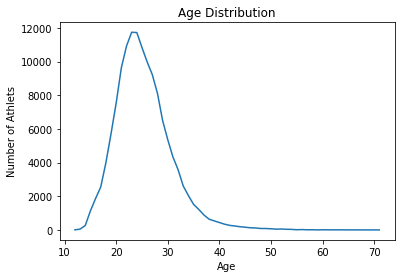

In [15]:
plt.plot(age_count['Age'],age_count['Age_Count'])

plt.xlabel('Age') # add to x-label to the plot
plt.ylabel('Number of Athlets') # add y-label to the plot
plt.title('Age Distribution') # add title to the plot

plt.show()

In [16]:
weight_count_m=pysqldf('''select Weight,Count(Weight) as 'Weight_Count' from sport_80 where Sex=1 group by Weight ''')
weight_count_f=pysqldf('''select Weight,Count(Weight) as 'Weight_Count' from sport_80 where Sex=0 group by Weight ''')

weight_m=pysqldf('''select Weight from sport_80 where Sex=1  ''')
weight_f=pysqldf('''select Weight from sport_80 where Sex=0  ''')

Text(0.5, 1.0, 'Box Weight Distribution Women')

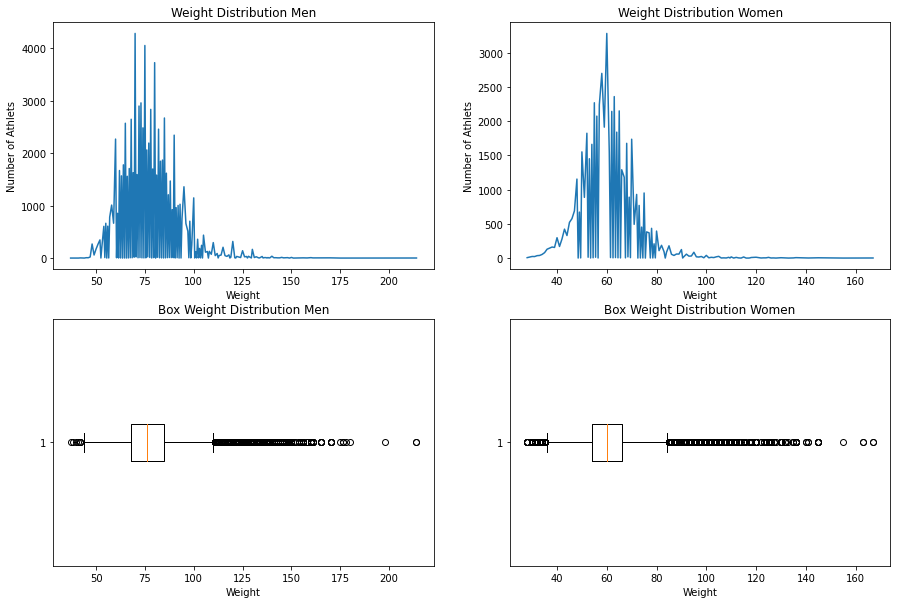

In [17]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

##DISTRIBUTION GRAPHS
axs[0,0].plot(weight_count_m['Weight'],weight_count_m['Weight_Count'])

axs[0,0].set_xlabel('Weight') # add to x-label to the plot
axs[0,0].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,0].set_title('Weight Distribution Men') # add title to the plot

axs[0,1].plot(weight_count_f['Weight'],weight_count_f['Weight_Count'])

axs[0,1].set_xlabel('Weight') # add to x-label to the plot
axs[0,1].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,1].set_title('Weight Distribution Women') # add title to the plot

##BOX PLOT
axs[1,0].boxplot(weight_m['Weight'],vert=False)

axs[1,0].set_xlabel('Weight') # add to x-label to the plot
axs[1,0].set_title('Box Weight Distribution Men') # add title to the plot

axs[1,1].boxplot(weight_f['Weight'],vert=False)

axs[1,1].set_xlabel('Weight') # add to x-label to the plot
axs[1,1].set_title('Box Weight Distribution Women') # add title to the plot

In [18]:
height_count_m=pysqldf('''select Height,Count(Height) as 'Height_Count' from sport_80 where Sex=1 group by Height ''')
height_count_f=pysqldf('''select Height,Count(Height) as 'Height_Count' from sport_80 where Sex=0 group by Height ''')

height_m=pysqldf('''select Height from sport_80 where Sex=1  ''')
height_f=pysqldf('''select Height from sport_80 where Sex=0  ''')

Text(0.5, 1.0, 'Box Height Distribution Women')

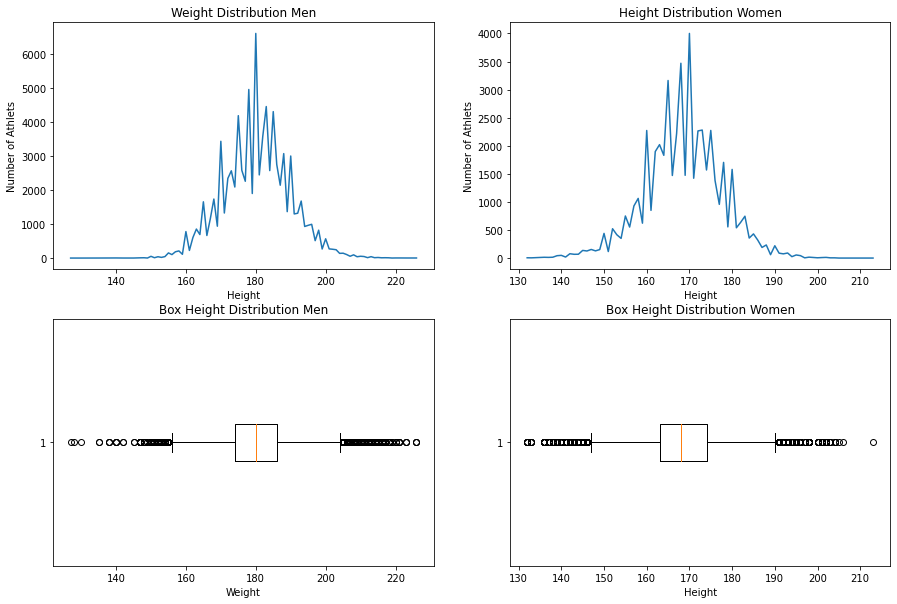

In [19]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

##DISTRIBUTION GRAPHS
axs[0,0].plot(height_count_m['Height'],height_count_m['Height_Count'])

axs[0,0].set_xlabel('Height') # add to x-label to the plot
axs[0,0].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,0].set_title('Weight Distribution Men') # add title to the plot

axs[0,1].plot(height_count_f['Height'],height_count_f['Height_Count'])

axs[0,1].set_xlabel('Height') # add to x-label to the plot
axs[0,1].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,1].set_title('Height Distribution Women') # add title to the plot

##BOX PLOT
axs[1,0].boxplot(height_m['Height'],vert=False)

axs[1,0].set_xlabel('Weight') # add to x-label to the plot
axs[1,0].set_title('Box Height Distribution Men') # add title to the plot

axs[1,1].boxplot(height_f['Height'],vert=False)

axs[1,1].set_xlabel('Height') # add to x-label to the plot
axs[1,1].set_title('Box Height Distribution Women') # add title to the plot

#### further quick exploration, looking for a relationship between weight and height

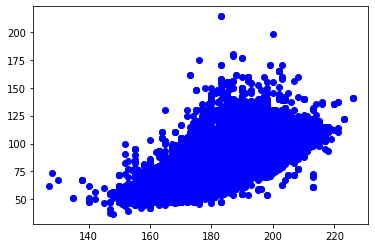

In [20]:
plt.scatter(height_m, weight_m,  color='blue')

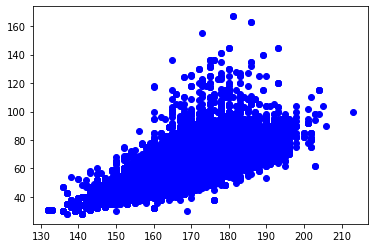

In [21]:
plt.scatter(height_f, weight_f,  color='blue')

#### 8. Let's make these statistics differentiating for winter sports vs summer sports

##### Weight

In [22]:
weight_count_m_s=pysqldf('''select Weight,Count(Weight) as 'Weight_Count' from sport_80 where Sex=1 and Season = 1 group by Weight ''')
weight_count_f_s=pysqldf('''select Weight,Count(Weight) as 'Weight_Count' from sport_80 where Sex=0 and Season = 1 group by Weight ''')

weight_m_s=pysqldf('''select Weight from sport_80 where Sex=1 and Season = 1 ''')
weight_f_s=pysqldf('''select Weight from sport_80 where Sex=0 and Season = 1 ''')

In [23]:
weight_count_m_w=pysqldf('''select Weight,Count(Weight) as 'Weight_Count' from sport_80 where Sex=1 and Season = 0 group by Weight ''')
weight_count_f_w=pysqldf('''select Weight,Count(Weight) as 'Weight_Count' from sport_80 where Sex=0 and Season = 0 group by Weight ''')

weight_m_w=pysqldf('''select Weight from sport_80 where Sex=1 and Season = 0 ''')
weight_f_w=pysqldf('''select Weight from sport_80 where Sex=0 and Season = 0 ''')

In [24]:
weight_m_s.describe()

,Weight
count,67371.000000
mean,77.312961
std,14.441964
min,37.000000
25%,68.000000
50%,75.000000
75%,85.000000
max,214.000000


In [25]:
weight_f_s.describe()

,Weight
count,41778.000000
mean,60.738702
std,11.175016
min,28.000000
25%,54.000000
50%,60.000000
75%,67.000000
max,167.000000


In [26]:
weight_m_w.describe()

,Weight
count,17829.000000
mean,77.231897
std,10.585654
min,47.000000
25%,70.000000
50%,76.000000
75%,84.000000
max,123.000000


In [27]:
weight_f_w.describe()

,Weight
count,9897.000000
mean,59.881075
std,7.105137
min,32.000000
25%,55.000000
50%,60.000000
75%,64.000000
max,96.000000


##### Height

In [28]:
height_count_m_s=pysqldf('''select Height,Count(Height) as 'Height_Count' from sport_80 where Sex=1 and Season = 1 group by Height ''')
height_count_f_s=pysqldf('''select Height,Count(Height) as 'Height_Count' from sport_80 where Sex=0 and Season = 1 group by Height ''')

height_m_s=pysqldf('''select Height from sport_80 where Sex=1 and Season = 1 ''')
height_f_s=pysqldf('''select Height from sport_80 where Sex=0 and Season = 1 ''')

In [29]:
height_count_m_w=pysqldf('''select Height,Count(Height) as 'Height_Count' from sport_80 where Sex=1 and Season = 0 group by Height ''')
height_count_f_w=pysqldf('''select Height,Count(Height) as 'Height_Count' from sport_80 where Sex=0 and Season = 0 group by Height ''')

height_m_w=pysqldf('''select Height from sport_80 where Sex=1 and Season = 0 ''')
height_f_w=pysqldf('''select Height from sport_80 where Sex=0 and Season = 0 ''')

In [30]:
height_m_s.describe()

,Height
count,67371.000000
mean,180.439239
std,10.192862
min,127.000000
25%,173.000000
50%,180.000000
75%,187.000000
max,226.000000


In [31]:
height_f_s.describe()

,Height
count,41778.000000
mean,168.949160
std,9.451111
min,132.000000
25%,163.000000
50%,169.000000
75%,175.000000
max,213.000000


In [32]:
height_m_w.describe()

,Height
count,17829.000000
mean,179.595659
std,6.258994
min,149.000000
25%,175.000000
50%,180.000000
75%,184.000000
max,206.000000


In [33]:
height_f_w.describe()

,Height
count,9897.000000
mean,166.876225
std,6.005163
min,142.000000
25%,163.000000
50%,167.000000
75%,171.000000
max,194.000000


#### Summer vs Winter Height

Text(0.5, 1.0, 'Box Height Distribution Men Winter')

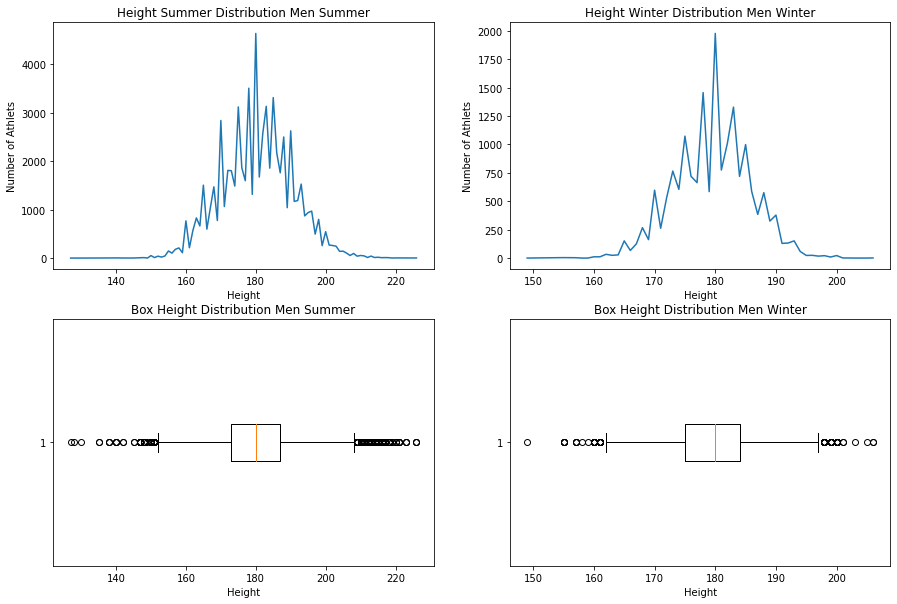

In [34]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

##DISTRIBUTION GRAPHS
axs[0,0].plot(height_count_m_s['Height'],height_count_m_s['Height_Count'])

axs[0,0].set_xlabel('Height') # add to x-label to the plot
axs[0,0].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,0].set_title('Height Summer Distribution Men Summer') # add title to the plot

axs[0,1].plot(height_count_m_w['Height'],height_count_m_w['Height_Count'])

axs[0,1].set_xlabel('Height') # add to x-label to the plot
axs[0,1].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,1].set_title('Height Winter Distribution Men Winter') # add title to the plot

##BOX PLOT
axs[1,0].boxplot(height_m_s['Height'],vert=False)

axs[1,0].set_xlabel('Height') # add to x-label to the plot
axs[1,0].set_title('Box Height Distribution Men Summer') # add title to the plot

axs[1,1].boxplot(height_m_w['Height'],vert=False)

axs[1,1].set_xlabel('Height') # add to x-label to the plot
axs[1,1].set_title('Box Height Distribution Men Winter') # add title to the plot

Text(0.5, 1.0, 'Box Height Distribution Women Winter')

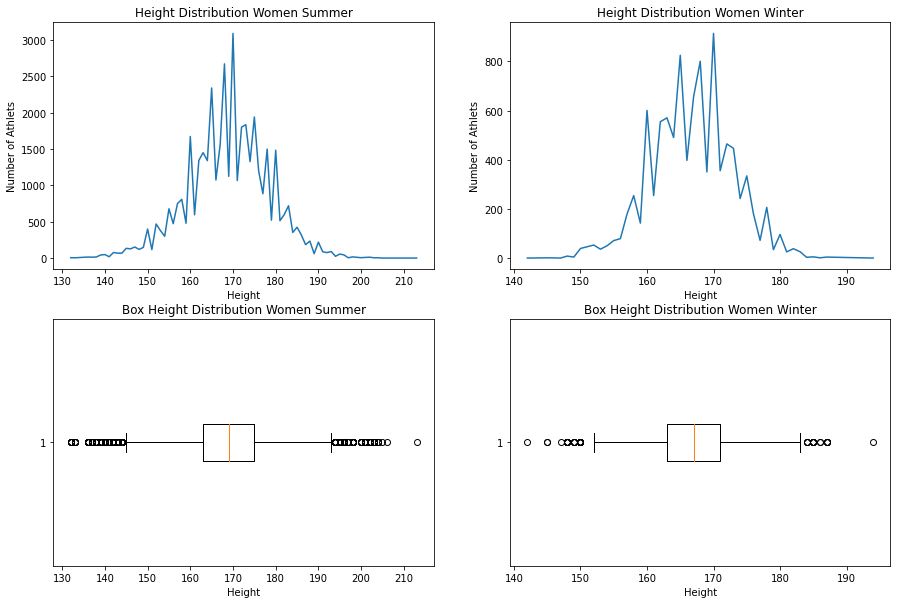

In [35]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

##DISTRIBUTION GRAPHS
axs[0,0].plot(height_count_f_s['Height'],height_count_f_s['Height_Count'])

axs[0,0].set_xlabel('Height') # add to x-label to the plot
axs[0,0].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,0].set_title('Height Distribution Women Summer') # add title to the plot

axs[0,1].plot(height_count_f_w['Height'],height_count_f_w['Height_Count'])

axs[0,1].set_xlabel('Height') # add to x-label to the plot
axs[0,1].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,1].set_title('Height Distribution Women Winter') # add title to the plot

##BOX PLOT
axs[1,0].boxplot(height_f_s['Height'],vert=False)

axs[1,0].set_xlabel('Height') # add to x-label to the plot
axs[1,0].set_title('Box Height Distribution Women Summer') # add title to the plot

axs[1,1].boxplot(height_f_w['Height'],vert=False)

axs[1,1].set_xlabel('Height') # add to x-label to the plot
axs[1,1].set_title('Box Height Distribution Women Winter') # add title to the plot

Text(0.5, 1.0, 'Box Weight Distribution Men Winter')

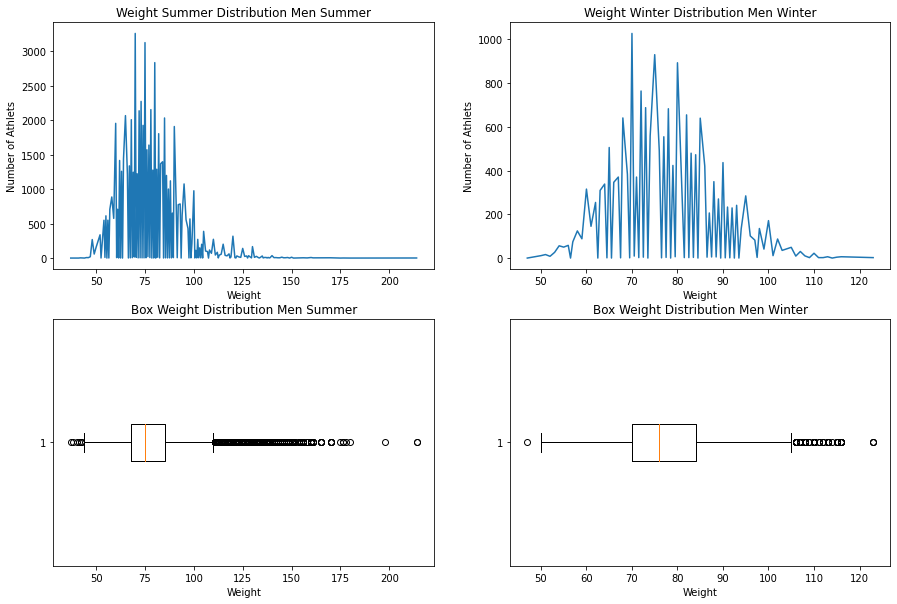

In [36]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

##DISTRIBUTION GRAPHS
axs[0,0].plot(weight_count_m_s['Weight'],weight_count_m_s['Weight_Count'])

axs[0,0].set_xlabel('Weight') # add to x-label to the plot
axs[0,0].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,0].set_title('Weight Summer Distribution Men Summer') # add title to the plot

axs[0,1].plot(weight_count_m_w['Weight'],weight_count_m_w['Weight_Count'])

axs[0,1].set_xlabel('Weight') # add to x-label to the plot
axs[0,1].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,1].set_title('Weight Winter Distribution Men Winter') # add title to the plot

##BOX PLOT
axs[1,0].boxplot(weight_m_s['Weight'],vert=False)

axs[1,0].set_xlabel('Weight') # add to x-label to the plot
axs[1,0].set_title('Box Weight Distribution Men Summer') # add title to the plot

axs[1,1].boxplot(weight_m_w['Weight'],vert=False)

axs[1,1].set_xlabel('Weight') # add to x-label to the plot
axs[1,1].set_title('Box Weight Distribution Men Winter') # add title to the plot

Text(0.5, 1.0, 'Box Weight Distribution Women Winter')

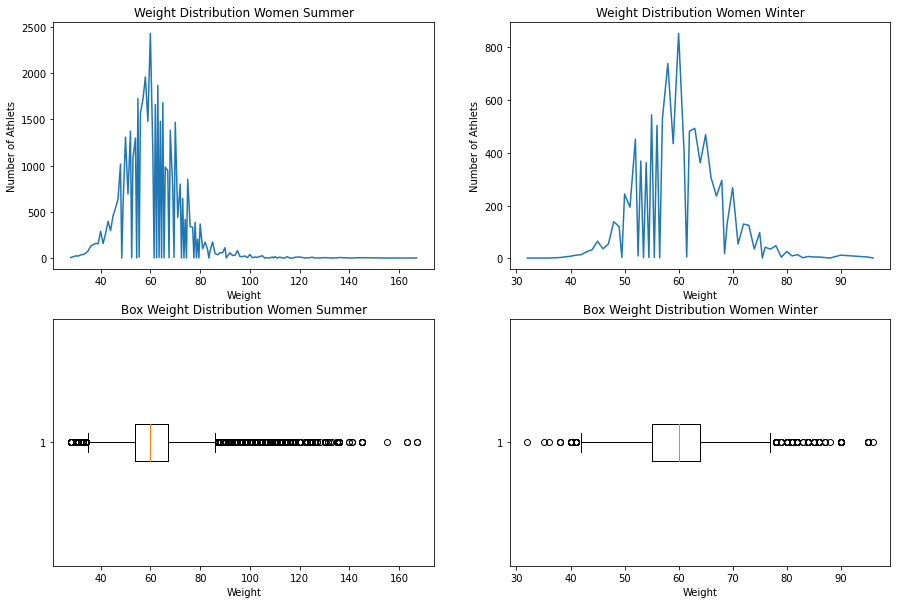

In [37]:
fig, axs = plt.subplots(2,2,figsize=(15,10))

##DISTRIBUTION GRAPHS
axs[0,0].plot(weight_count_f_s['Weight'],weight_count_f_s['Weight_Count'])

axs[0,0].set_xlabel('Weight') # add to x-label to the plot
axs[0,0].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,0].set_title('Weight Distribution Women Summer') # add title to the plot

axs[0,1].plot(weight_count_f_w['Weight'],weight_count_f_w['Weight_Count'])

axs[0,1].set_xlabel('Weight') # add to x-label to the plot
axs[0,1].set_ylabel('Number of Athlets') # add y-label to the plot
axs[0,1].set_title('Weight Distribution Women Winter') # add title to the plot

##BOX PLOT
axs[1,0].boxplot(weight_f_s['Weight'],vert=False)

axs[1,0].set_xlabel('Weight') # add to x-label to the plot
axs[1,0].set_title('Box Weight Distribution Women Summer') # add title to the plot

axs[1,1].boxplot(weight_f_w['Weight'],vert=False)

axs[1,1].set_xlabel('Weight') # add to x-label to the plot
axs[1,1].set_title('Box Weight Distribution Women Winter') # add title to the plot

### A/B TESTING

In [38]:
t_stat, p_val= ss.ttest_ind(height_m_s['Height'],height_m_w['Height'])
t_stat, p_val

(10.537528545769307, 6.017725959006674e-26)

In [39]:
t_stat, p_val= ss.ttest_ind(height_f_s['Height'],height_f_w['Height'])
t_stat, p_val

(20.84581328231301, 4.1439688067478515e-96)

In [40]:
t_stat, p_val= ss.ttest_ind(weight_m_s['Weight'],weight_m_w['Weight'])
t_stat, p_val

(0.7012859803826186, 0.4831264765792309)

In [41]:
t_stat, p_val= ss.ttest_ind(weight_f_s['Weight'],weight_f_w['Weight'])
t_stat, p_val

(7.293597248171901, 3.0610024058333367e-13)

#### H0 hyphotesis is rejected most of the time, so it seems to be a difference in weight and height for winter sport and summer sport, exept for the weight of men which seems to be equal in the both groups, winter athletes and summer athletes.

### A/B TESTING FOR  DIFFERENCE BETWEEN SPORTS

In [42]:
Sport_tt1=pysqldf('''select Height,Weight from sport_80 Where Sport = 'Gymnastics' and Sex=1 ''')
Sport_tt2=pysqldf('''select Height,Weight from sport_80 Where Sport = 'Athletics' and Sex=1 ''')

t_stat, p_val= ss.ttest_ind(Sport_tt1['Height'],Sport_tt2['Height'])
print('Height T-stat: ', t_stat,'Height p-value: ', p_val)

t_stat, p_val= ss.ttest_ind(Sport_tt1['Weight'],Sport_tt2['Weight'])
print('Weight T-stat: ', t_stat,'Weight p-value: ', p_val)

Height T-stat:  -111.3967094784561 Height p-value:  0.0
Weight T-stat:  -53.347663315055506 Weight p-value:  0.0


Text(0.5, 1.0, 'Box Weight Distribution Athletics')

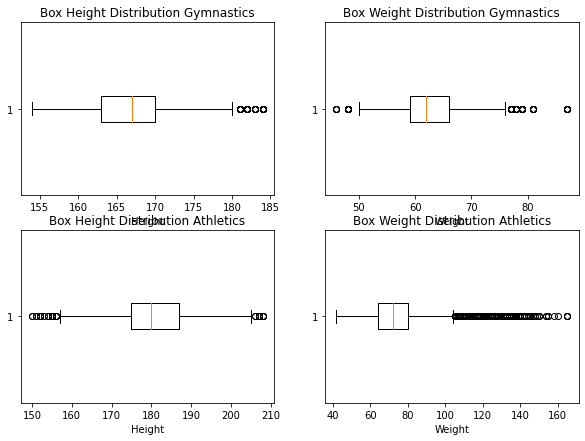

In [43]:
fig, axs = plt.subplots(2,2,figsize=(10,7))

##BOX PLOT
axs[0,0].boxplot(Sport_tt1['Height'],vert=False)

axs[0,0].set_xlabel('Height') # add to x-label to the plot
axs[0,0].set_title('Box Height Distribution Gymnastics') # add title to the plot

axs[1,0].boxplot(Sport_tt2['Height'],vert=False)

axs[1,0].set_xlabel('Height') # add to x-label to the plot
axs[1,0].set_title('Box Height Distribution Athletics') # add title to the plot

##BOX PLOT
axs[0,1].boxplot(Sport_tt1['Weight'],vert=False)

axs[0,1].set_xlabel('Weight') # add to x-label to the plot
axs[0,1].set_title('Box Weight Distribution Gymnastics') # add title to the plot

axs[1,1].boxplot(Sport_tt2['Weight'],vert=False)

axs[1,1].set_xlabel('Weight') # add to x-label to the plot
axs[1,1].set_title('Box Weight Distribution Athletics') # add title to the plot

#### Let's see if there exists difference in hight between China and Italy for the male population

In [44]:
height_ita=pysqldf('''select Height from sport_80 where NOC="ITA" and Sex=1 ''')
height_chn=pysqldf('''select Height from sport_80 where NOC="CHN" and Sex=1 ''')
height_ita.describe()

,Height
count,3369.000000
mean,180.266845
std,8.870825
min,152.000000
25%,174.000000
50%,180.000000
75%,186.000000
max,215.000000


In [45]:
height_chn.describe()

,Height
count,2121.000000
mean,177.689769
std,11.732913
min,148.000000
25%,170.000000
50%,178.000000
75%,185.000000
max,226.000000


Text(0.5, 1.0, 'Box Height Distribution CHN')

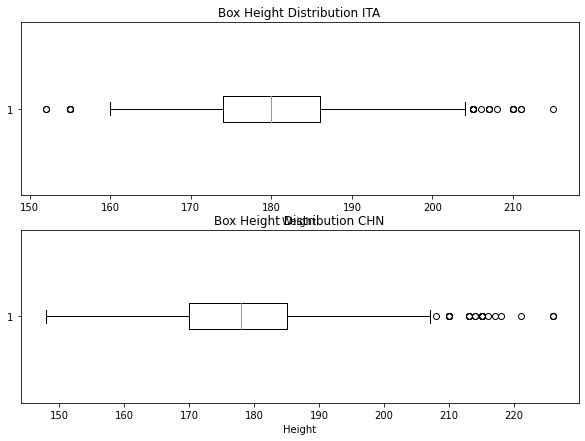

In [46]:
fig, axs = plt.subplots(2,figsize=(10,7))

##BOX PLOT
axs[0].boxplot(height_ita['Height'],vert=False)

axs[0].set_xlabel('Weight') # add to x-label to the plot
axs[0].set_title('Box Height Distribution ITA') # add title to the plot

axs[1].boxplot(height_chn['Height'],vert=False)

axs[1].set_xlabel('Height') # add to x-label to the plot
axs[1].set_title('Box Height Distribution CHN') # add title to the plot

In [47]:
t_stat, p_val= ss.ttest_ind(height_ita['Height'],height_chn['Height'])
t_stat, p_val

(9.229752559109919, 3.791512826226679e-20)

#### 9. Let's explore the sports

Text(0.5, 1.0, 'Summer Sports with Most observations')

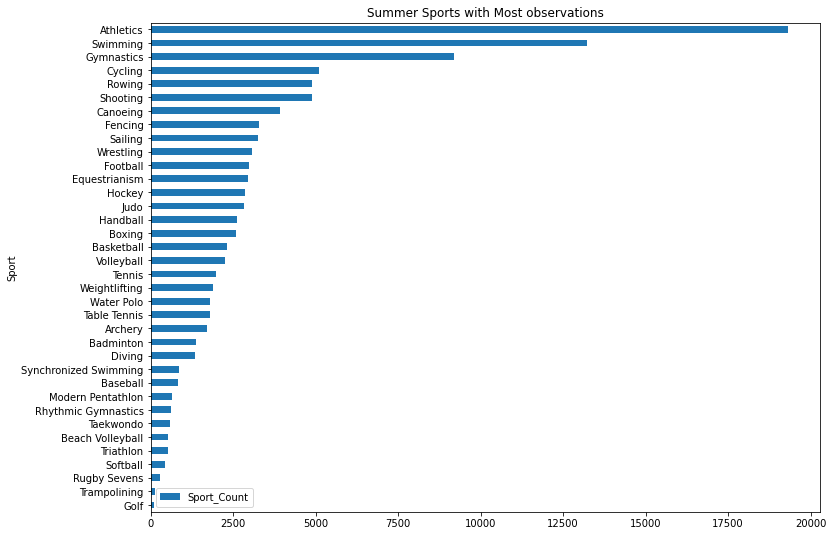

In [48]:
obv_sport=pysqldf('''select Sport,Count(Sport) as 'Sport_Count' from sport_80 group by Sport ''')

obv_sport_s=pysqldf('''select Sport,Count(Sport) as 'Sport_Count' from sport_80 Where Season = 1 group by Sport ''')

obv_sport_s.sort_values(by='Sport_Count', ascending=True, inplace=True)

obv_sport_s.set_index('Sport', inplace=True)

obv_sport_s.plot.barh(figsize=(12,9)).set_title('Summer Sports with Most observations')

Text(0.5, 1.0, 'Winter Sports with Most observations')

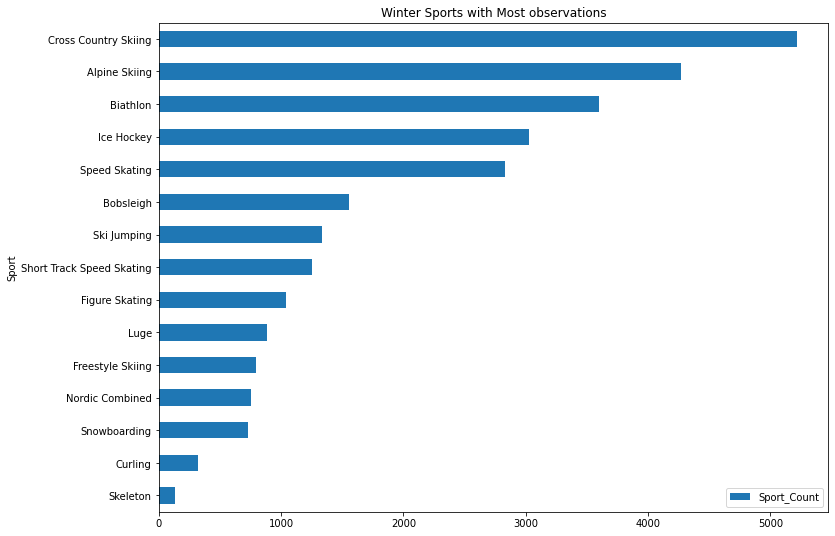

In [49]:
obv_sport_w=pysqldf('''select Sport,Count(Sport) as 'Sport_Count' from sport_80 Where Season = 0 group by Sport ''')

obv_sport_w.sort_values(by='Sport_Count', ascending=True, inplace=True)

obv_sport_w.set_index('Sport', inplace=True)

obv_sport_w.plot.barh(figsize=(12,9)).set_title('Winter Sports with Most observations')

#### For Further data exploration I Will focus on 4 sports: Atheletic, Swimming, Gymnastics and Cross Country Skiing

### 10. Regression Analysis

#### I will run 4 analysis for each group:
1. Analysis on the subset of Cross Country Skiing
2. Analysis on the subset of Gymnastics
3. Analysis on the subset of Swimming
4. Analysis on the subset of Atheletics

#### First I must check if the group male and female are equale or different, otherwise adding these two groups in the same regression can lead to bias estiamtes

In [50]:
t_stat, p_val= ss.ttest_ind(weight_m['Weight'],weight_f['Weight'])
print('Difference in Weight; t_stat: ',t_stat, 'p_value: ', p_val)

t_stat, p_val= ss.ttest_ind(height_m['Height'],height_f['Height'])
print('Difference in Height; t_stat: ',t_stat, 'p_value: ', p_val)

Difference in Weight; t_stat:  237.78583480326142 p_value:  0.0
Difference in Height; t_stat:  225.90664378364585 p_value:  0.0


#### the two group are heterogenous

#### Now I want to create binary variable for each NOC, in order to see the influence of each country

#### the following variables will be removed from sport_80: ID, Name, City,Year, NOC_ITA(to avoid collinearity), costant will capture ITALIAN observations

In [51]:
dummies=pd.get_dummies(sport_80[['NOC']])

dummies=dummies.drop(['NOC_ITA'],axis=1)

dataset=sport_80.drop(['NOC','ID','Name','City','Year'],axis=1)

dataset = pd.concat([dataset,dummies],axis=1)

dataset.head(5)

,Age,Height,Weight,Sport,Sex,Season,Win,NOC_AFG,NOC_AHO,NOC_ALB,...,NOC_VAN,NOC_VEN,NOC_VIE,NOC_VIN,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,24.0,180.0,80.0,Basketball,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,170.0,60.0,Judo,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21.0,185.0,82.0,Speed Skating,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21.0,185.0,82.0,Speed Skating,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.0,185.0,82.0,Speed Skating,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's prepare data for the first regression

In [52]:
reg1_m_x=pysqldf('''select * from dataset Where Sport = 'Cross Country Skiing' and Sex = 1 ''')
reg1_m_y=pysqldf('''select Win from dataset Where Sport = 'Cross Country Skiing' and Sex = 1 ''')

reg1_f_x=pysqldf('''select * from dataset Where Sport = 'Cross Country Skiing' and Sex = 0 ''')
reg1_f_y=pysqldf('''select Win from dataset Where Sport = 'Cross Country Skiing' and Sex = 0 ''')

reg1_m_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_f_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_m_x.head()

,Age,Height,Weight,Sex,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,...,NOC_VAN,NOC_VEN,NOC_VIE,NOC_VIN,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,31.0,188.0,75.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,188.0,75.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31.0,188.0,75.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31.0,188.0,75.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33.0,188.0,75.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MALE CROSS COUNTRY SKIING

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( reg1_m_x, reg1_m_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2334, 221) (2334, 1)
Test set: (584, 221) (584, 1)


In [54]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())
LR

LogisticRegression(C=0.01, solver='liblinear')

In [55]:
yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

In [56]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

JACCARD:  0.9332191780821918
F1:  0.9009822002742153
LogLoss:  0.2371746178926959


#### logistic model seems cool to predict the value

#### let's try with standard ols

In [57]:
import statsmodels.api as sm

## X is the input variables (or independent variables)
X = reg1_m_x
## y is the target/dependent variable
y = reg1_m_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     7.356
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           9.35e-64
Time:                        17:27:48   Log-Likelihood:                 69.916
No. Observations:                2918   AIC:                             6.167
Df Residuals:                    2845   BIC:                             442.6
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0027      0.001      2.287      0.022       0.000       0.005
Height         0.0016      0.001      1.171      0.242      -0.001       0.004
Weight         0.0018      0.001      1.311      0.190      -0.001       0.004
Sex           -0.3324      0.184     -1.805      0.071      -0.693       0.029
NOC_AFG     3.898e-15   3.06e-14      0.127      0.899   -5.61e-14    6.39e-14
NOC_AHO     1.557e-14    4.9e-14      0.318      0.751   -8.05e-14    1.12e-13
NOC_ALB     3.115e-14   7.94e-14      0.392      0.695   -1.25e-13    1.87e-13
NOC_ALG       -0.1000      0.241     -0.416      0.678      -0.572       0.372
NOC_AND       -0.1656      0.121     -1.367      0.172      -0.403       0.072
NOC_ANG     8.302e-15   3.69e-14      0.225      0.822   -6.41e-14    8.07e-14
NOC_ANT    -5.907e-15   1.48e-14     -0.400      0.689   -3.49e-14    2.31e-14
NOC_ARG       -0.1382      0.065     -2.123      0.034      -0.266      -0.011
NOC_ARM       -0.1135      0.083     -1.369      0.171      -0.276       0.049
NOC_ARU    -3.812e-15   2.96e-14     -0.129      0.897   -6.18e-14    5.42e-14
NOC_ASA     4.838e-15    2.2e-14      0.220      0.826   -3.83e-14    4.79e-14
NOC_AUS       -0.1469      0.042     -3.525      0.000      -0.229      -0.065
NOC_AUT       -0.1049      0.034     -3.089      0.002      -0.172      -0.038
NOC_AZE    -1.898e-15    1.4e-14     -0.135      0.892   -2.94e-14    2.56e-14
NOC_BAH     1.656e-15   9.34e-15      0.177      0.859   -1.67e-14       2e-14
NOC_BAN    -1.892e-15   1.59e-14     -0.119      0.905    -3.3e-14    2.92e-14
NOC_BAR    -4.582e-16   1.02e-14     -0.045      0.964   -2.04e-14    1.95e-14
NOC_BDI    -5.836e-16   7.29e-15     -0.080      0.936   -1.49e-14    1.37e-14
NOC_BEL     1.478e-15   1.36e-14      0.109      0.913   -2.51e-14    2.81e-14
NOC_BEN    -2.917e-16   7.75e-15     -0.038      0.970   -1.55e-14    1.49e-14
NOC_BER       -0.1997      0.171     -1.170      0.242      -0.534       0.135
NOC_BHU     6.741e-16   3.68e-14      0.018      0.985   -7.15e-14    7.29e-14
NOC_BIH       -0.1461      0.140     -1.044      0.297      -0.421       0.128
NOC_BIZ    -7.161e-16   4.38e-14     -0.016      0.987   -8.66e-14    8.52e-14
NOC_BLR       -0.1464      0.032     -4.543      0.000      -0.210      -0.083
NOC_BOL    -1.639e-16   9.59e-15     -0.017      0.986    -1.9e-14    1.86e-14
NOC_BOT    -6.597e-18   1.22e-14     -0.001      1.000   -2.39e-14    2.39e-14
NOC_BRA       -0.1738      0.140     -1.245      0.213      -0.447       0.100
NOC_BRN     2.934e-16    8.7e-16      0.337      0.736   -1.41e-15       2e-15
NOC_BRU    -3.039e-16   1.59e-14     -0.019      0.985   -3.14e-14    3.08e-14
NOC_BUL       -0.1233      0.036     -3.422      0.001      -0.194      -0.053
NOC_BUR     1.574e-16   9.64e-15      0.016      0.987   -1.87e-14    1.91e-14
NO

#### let's try without country assuming that are all identical

In [58]:
reg1_m_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Cross Country Skiing' and Sex = 1 ''')

## X is the input variables (or independent variables)
X = reg1_m_x
## y is the target/dependent variable
y = reg1_m_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     22.14
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           3.57e-14
Time:                        17:28:14   Log-Likelihood:                -146.30
No. Observations:                2918   AIC:                             300.6
Df Residuals:                    2914   BIC:                             324.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8380      0.169     -4.962      0.000      -1.169      -0.507
Age            0.0058      0.001      5.279      0.000       0.004       0.008
Weight         0.0009      0.001      0.703      0.482      -0.002       0.003
Height         0.0039      0.001      3.006      0.003       0.001       0.006
==============================================================================
Omnibus:                     1894.144   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14206.977
Skew:                           3.218   Prob(JB):                         0.00
Kurtosis:                      11.684   Cond. No.                     6.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# FEMALE CROSS COUNTRY SKIING

In [59]:
X_train, X_test, y_train, y_test = train_test_split( reg1_f_x, reg1_f_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (1836, 221) (1836, 1)
Test set: (459, 221) (459, 1)
JACCARD:  0.9084967320261438
F1:  0.8649386695317397
LogLoss:  0.29696292481597647


In [60]:
reg1_f_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Cross Country Skiing' and Sex = 0 ''')

## X is the input variables (or independent variables)
X = reg1_f_x
## y is the target/dependent variable
y = reg1_f_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.549
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.21e-05
Time:                        17:28:40   Log-Likelihood:                -389.46
No. Observations:                2295   AIC:                             786.9
Df Residuals:                    2291   BIC:                             809.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2911      0.206     -1.412      0.158      -0.695       0.113
Age            0.0065      0.001      4.743      0.000       0.004       0.009
Weight         0.0014      0.002      0.760      0.448      -0.002       0.005
Height         0.0008      0.002      0.522      0.602      -0.002       0.004
==============================================================================
Omnibus:                     1264.762   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6288.098
Skew:                           2.785   Prob(JB):                         0.00
Kurtosis:                       8.893   Cond. No.                     6.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# GYMNASTICS

In [61]:
reg1_m_x=pysqldf('''select * from dataset Where Sport = 'Gymnastics' and Sex = 1 ''')
reg1_m_y=pysqldf('''select Win from dataset Where Sport = 'Gymnastics' and Sex = 1 ''')

reg1_f_x=pysqldf('''select * from dataset Where Sport = 'Gymnastics' and Sex = 0 ''')
reg1_f_y=pysqldf('''select Win from dataset Where Sport = 'Gymnastics' and Sex = 0 ''')

reg1_m_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_f_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_m_x.head()

,Age,Height,Weight,Sex,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,...,NOC_VAN,NOC_VEN,NOC_VIE,NOC_VIN,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,23.0,167.0,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,167.0,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23.0,167.0,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23.0,167.0,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23.0,167.0,64.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MALE GYMNASTICS

In [62]:
X_train, X_test, y_train, y_test = train_test_split( reg1_m_x, reg1_m_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (4250, 221) (4250, 1)
Test set: (1063, 221) (1063, 1)
JACCARD:  0.9275634995296331
F1:  0.8927063060382804
LogLoss:  0.253696171549855


In [63]:
reg1_m_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Gymnastics' and Sex = 1 ''')

## X is the input variables (or independent variables)
X = reg1_m_x
## y is the target/dependent variable
y = reg1_m_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.40
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           5.67e-10
Time:                        17:30:56   Log-Likelihood:                -116.19
No. Observations:                5313   AIC:                             240.4
Df Residuals:                    5309   BIC:                             266.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6951      0.129      5.372      0.000       0.441       0.949
Age           -0.0011      0.001     -1.023      0.306      -0.003       0.001
Weight        -0.0015      0.001     -1.688      0.092      -0.003       0.000
Height        -0.0030      0.001     -3.131      0.002      -0.005      -0.001
==============================================================================
Omnibus:                     3673.557   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32838.161
Skew:                           3.450   Prob(JB):                         0.00
Kurtosis:                      13.037   Cond. No.                     6.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## FEMALE GYMNASTICS

In [64]:
X_train, X_test, y_train, y_test = train_test_split( reg1_f_x, reg1_f_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (3104, 221) (3104, 1)
Test set: (777, 221) (777, 1)
JACCARD:  0.9395109395109396
F1:  0.9102096693337569
LogLoss:  0.2105092609797363


In [65]:
reg1_f_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Gymnastics' and Sex = 0 ''')

## X is the input variables (or independent variables)
X = reg1_f_x
## y is the target/dependent variable
y = reg1_f_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.84
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           4.35e-07
Time:                        17:31:25   Log-Likelihood:                -171.85
No. Observations:                3881   AIC:                             351.7
Df Residuals:                    3877   BIC:                             376.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3035      0.112      2.703      0.007       0.083       0.524
Age            0.0015      0.002      1.001      0.317      -0.001       0.004
Weight        -0.0031      0.001     -3.055      0.002      -0.005      -0.001
Height        -0.0008      0.001     -0.883      0.377      -0.003       0.001
==============================================================================
Omnibus:                     2608.201   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21328.329
Skew:                           3.347   Prob(JB):                         0.00
Kurtosis:                      12.331   Cond. No.                     4.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# SWIMMING

In [66]:
reg1_m_x=pysqldf('''select * from dataset Where Sport = 'Swimming' and Sex = 1 ''')
reg1_m_y=pysqldf('''select Win from dataset Where Sport = 'Swimming' and Sex = 1 ''')

reg1_f_x=pysqldf('''select * from dataset Where Sport = 'Swimming' and Sex = 0 ''')
reg1_f_y=pysqldf('''select Win from dataset Where Sport = 'Swimming' and Sex = 0 ''')

reg1_m_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_f_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_m_x.head()

,Age,Height,Weight,Sex,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,...,NOC_VAN,NOC_VEN,NOC_VIE,NOC_VIN,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,21.0,194.0,78.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,194.0,78.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21.0,194.0,78.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.0,194.0,78.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25.0,194.0,78.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MALE SWIMMING

In [67]:
X_train, X_test, y_train, y_test = train_test_split( reg1_m_x, reg1_m_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (5779, 221) (5779, 1)
Test set: (1445, 221) (1445, 1)
JACCARD:  0.8983994432846207
F1:  0.8561361716531566
LogLoss:  0.2853239327386603


In [69]:
reg1_m_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Swimming' and Sex = 1 ''')

## X is the input variables (or independent variables)
X = reg1_m_x
## y is the target/dependent variable
y = reg1_m_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     102.5
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           5.30e-65
Time:                        17:40:31   Log-Likelihood:                -1820.6
No. Observations:                7224   AIC:                             3649.
Df Residuals:                    7220   BIC:                             3677.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8752      0.107     -8.202      0.000      -1.084      -0.666
Age            0.0024      0.001      2.197      0.028       0.000       0.005
Weight         0.0053      0.001      7.580      0.000       0.004       0.007
Height         0.0028      0.001      3.625      0.000       0.001       0.004
==============================================================================
Omnibus:                     3070.015   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10083.866
Skew:                           2.278   Prob(JB):                         0.00
Kurtosis:                       6.569   Cond. No.                     5.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## FEMALE SWIMMING

In [70]:
X_train, X_test, y_train, y_test = train_test_split( reg1_f_x, reg1_f_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (4794, 221) (4794, 1)
Test set: (1199, 221) (1199, 1)
JACCARD:  0.8740617180984154
F1:  0.8153241482573559
LogLoss:  0.33126567425804915


In [71]:
reg1_f_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Swimming' and Sex = 0 ''')

## X is the input variables (or independent variables)
X = reg1_f_x
## y is the target/dependent variable
y = reg1_f_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     67.15
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.06e-42
Time:                        17:40:52   Log-Likelihood:                -1886.5
No. Observations:                5993   AIC:                             3781.
Df Residuals:                    5989   BIC:                             3808.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0801      0.123     -8.782      0.000      -1.321      -0.839
Age            0.0039      0.001      3.475      0.001       0.002       0.006
Weight         0.0038      0.001      3.907      0.000       0.002       0.006
Height         0.0052      0.001      5.586      0.000       0.003       0.007
==============================================================================
Omnibus:                     2223.010   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6003.746
Skew:                           2.080   Prob(JB):                         0.00
Kurtosis:                       5.597   Cond. No.                     5.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ATHLETICS

In [72]:
reg1_m_x=pysqldf('''select * from dataset Where Sport = 'Athletics' and Sex = 1 ''')
reg1_m_y=pysqldf('''select Win from dataset Where Sport = 'Athletics' and Sex = 1 ''')

reg1_f_x=pysqldf('''select * from dataset Where Sport = 'Athletics' and Sex = 0 ''')
reg1_f_y=pysqldf('''select Win from dataset Where Sport = 'Athletics' and Sex = 0 ''')

reg1_m_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_f_x.drop(['Win','Sport','Season'],axis=1,inplace=True)
reg1_m_x.head()

,Age,Height,Weight,Sex,NOC_AFG,NOC_AHO,NOC_ALB,NOC_ALG,NOC_AND,NOC_ANG,...,NOC_VAN,NOC_VEN,NOC_VIE,NOC_VIN,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
0,31.0,189.0,130.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.0,187.0,76.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,170.0,65.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26.0,182.0,67.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27.0,190.0,80.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MALE ATHLETICS

In [73]:
X_train, X_test, y_train, y_test = train_test_split( reg1_m_x, reg1_m_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (8951, 221) (8951, 1)
Test set: (2238, 221) (2238, 1)
JACCARD:  0.9186773905272565
F1:  0.8797395039236328
LogLoss:  0.27210371220593615


In [74]:
reg1_m_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Athletics' and Sex = 1 ''')

## X is the input variables (or independent variables)
X = reg1_m_x
## y is the target/dependent variable
y = reg1_m_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     22.79
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.05e-14
Time:                        17:42:39   Log-Likelihood:                -1040.9
No. Observations:               11189   AIC:                             2090.
Df Residuals:                   11185   BIC:                             2119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2283      0.067     -3.399      0.001      -0.360      -0.097
Age           -0.0013      0.001     -2.292      0.022      -0.002      -0.000
Weight         0.0004      0.000      2.021      0.043     1.3e-05       0.001
Height         0.0017      0.000      4.107      0.000       0.001       0.003
==============================================================================
Omnibus:                     6992.686   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48270.535
Skew:                           3.148   Prob(JB):                         0.00
Kurtosis:                      10.994   Cond. No.                     5.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## FEMALE ATHLETICS

In [75]:
X_train, X_test, y_train, y_test = train_test_split( reg1_f_x, reg1_f_y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train.values.ravel())

yhat_lr = LR.predict(X_test)
yhat_lr_prob = LR.predict_proba(X_test)

print('JACCARD: ', jaccard_score(y_test, yhat_lr,pos_label=0)) #not winning a medal
print('F1: ', f1_score(y_test, yhat_lr, average='weighted'))
print('LogLoss: ', log_loss(y_test, yhat_lr_prob))

Train set: (6508, 221) (6508, 1)
Test set: (1627, 221) (1627, 1)
JACCARD:  0.9084204056545789
F1:  0.864827928861493
LogLoss:  0.296838593714039


In [76]:
reg1_f_x=pysqldf('''select Age,Weight,Height from dataset Where Sport = 'Athletics' and Sex = 0 ''')

## X is the input variables (or independent variables)
X = reg1_f_x
## y is the target/dependent variable
y = reg1_f_y
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     11.24
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.35e-07
Time:                        17:43:01   Log-Likelihood:                -1556.0
No. Observations:                8135   AIC:                             3120.
Df Residuals:                    8131   BIC:                             3148.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2771      0.085     -3.243      0.001      -0.445      -0.110
Age            0.0016      0.001      2.316      0.021       0.000       0.003
Weight         0.0004      0.000      1.055      0.291      -0.000       0.001
Height         0.0018      0.001      3.205      0.001       0.001       0.003
==============================================================================
Omnibus:                     4334.156   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20643.256
Skew:                           2.740   Prob(JB):                         0.00
Kurtosis:                       8.556   Cond. No.                     4.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""